In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import getpass
user = getpass.getuser()

In [3]:
from PIL import Image

In [4]:
from omni.isaac.kit import SimulationApp

# "/home/yizhou/Research/OpenAnyDrawer/scene0.usd" # 
usd_path = f"omniverse://localhost/Users/{user}/scene4.usd"


simulation_app = SimulationApp({"headless": True, "open_usd": usd_path,  "livesync_usd": usd_path}) 


Starting kit application with the fillowing args:  ['/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/exts/omni.isaac.kit/omni/isaac/kit/simulation_app.py', '/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/apps/omni.isaac.sim.python.kit', '--/app/tokens/exe-path=/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/kit', '--/persistent/app/viewport/displayOptions=3094', '--/rtx/materialDb/syncLoads=True', '--/rtx/hydra/materialSyncLoads=True--/omni.kit.plugin/syncUsdLoads=True', '--/app/renderer/resolution/width=1280', '--/app/renderer/resolution/height=720', '--/app/window/width=1440', '--/app/window/height=900', '--/renderer/multiGpu/enabled=True', '--ext-folder', '/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/exts', '--ext-folder', '/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/apps', '--portable', '--no-window']
Passing the following args to the base kit application:  ['-f', '/home/yizhou/.local/share/jupyter/runtime/kernel-9d4abbfa-1830-4de6-a509-3c3d90b3b4c1.json

OmniAssetFileFormat
2022-08-30 00:45:01 [2,260ms] [Error] [rtx.neuraylib.plugin] [DYNLIB:IO]   0.1   DYNLIB io   error: /home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/kit/python/bin/libs/iray/libnvindex.so: cannot open shared object file: No such file or directory
2022-08-30 00:45:01 [2,260ms] [Error] [rtx.neuraylib.plugin] [INDEX:MAIN]   0.1   INDEX  main error: Failed to load /home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/kit/python/bin/libs/iray/libnvindex.so


[1.845s] [ext: omni.mdl-0.1.0] startup
[1.871s] [ext: omni.kit.menu.create-1.0.2] startup
[1.872s] [ext: omni.kit.window.file_exporter-1.0.4] startup
[1.874s] [ext: omni.kit.window.drop_support-1.0.0] startup
[1.875s] [ext: omni.kit.material.library-1.3.10] startup
[1.880s] [ext: omni.kit.window.property-1.6.3] startup
[1.882s] [ext: omni.kit.context_menu-1.3.9] startup
[1.886s] [ext: omni.kit.window.file_importer-1.0.4] startup
[1.887s] [ext: omni.kit.stage_templates-1.1.2] startup
[1.889s] [ext: omni.kit.widget.stage-2.6.15] startup
[1.893s] [ext: omni.kit.window.file-1.3.16] startup
[1.895s] [ext: omni.debugdraw-0.1.0] startup
[1.902s] [ext: omni.kit.window.content_browser-2.4.28] startup
[1.917s] [ext: omni.kit.widget.prompt-1.0.1] startup
[1.918s] [ext: omni.kit.property.usd-3.14.8] startup
[1.984s] [ext: omni.hydra.engine.stats-1.0.0] startup
[2.002s] [ext: omni.kit.widget.settings-1.0.0] startup
[2.005s] [ext: omni.graph.tools-1.3.5] startup
[2.085s] [ext: omni.graph.core-2.27.0

In [5]:
# world
from omni.isaac.core import World
world = World()

In [6]:
# reset scene
import omni
mobility_prim = world.scene.stage.GetPrimAtPath("/World/Game/mobility")
if mobility_prim:
    omni.kit.commands.execute("DeletePrims", paths=["/World/Game/mobility"])
    
# hide robot
# hand_prim = world.scene.stage.GetPrimAtPath("/World/allegro")
# hand_prim.GetAttribute('visibility').Set('invisible')

In [7]:
from open_env import OpenEnv

env = OpenEnv()

In [8]:
from franka.gripper import GripperHandEnv

# env = HandEnv("/World/Hand/Bones/l_carpal_mid", "/World/Hand*/Bones/l_thumbSkeleton_grp/l_distalThumb_mid")
controller = GripperHandEnv("/World/Franka/panda_link8", "/World/AnchorXform")

In [9]:
env.add_camera()
env.setup_viewport()

simlation context numpy None
num_envs 1


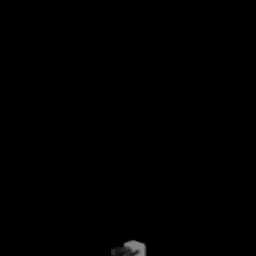

In [10]:
# init
world.reset()
controller.start()
world.scene.add(controller.robots)

world.render()
env.get_image()

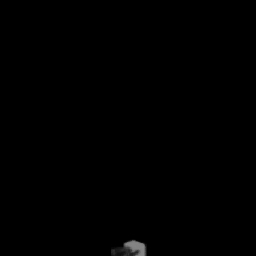

In [11]:
world.render()
env.get_image()

In [142]:
env.add_object(0, scale = 0.1)

add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_7/physicsMaterial
add physics material to handle


In [143]:
from omni.isaac.core.prims.xform_prim import XFormPrim
mobility_obj = XFormPrim("/World/Game/mobility")
mobility_obj_name = mobility_obj.name

world.scene.add(mobility_obj)

In [144]:
from task.checker import TaskChecker
from task.instructor import SceneInstructor

In [145]:
scene_instr = SceneInstructor()
scene_instr.analysis()

analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_7': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'right', 'direction': 'horizontal'}}


In [146]:
scene_instr.is_obj_valid

True

In [147]:
scene_instr.valid_handle_list

{'/World/Game/mobility/link_0/visuals/handle_7': {'joint_type': 'PhysicsRevoluteJoint',
  'cabinet_type': 'door',
  'vertical_description': '',
  'horizontal_description': '',
  'joint': 'joint_0',
  'relative_to_game_center': 'right',
  'direction': 'horizontal'}}

In [148]:
handle_path_str = list(scene_instr.valid_handle_list.keys())[0]

handle_joint_type = scene_instr.valid_handle_list[handle_path_str]["joint_type"]
handle_joint = scene_instr.valid_handle_list[handle_path_str]["joint"]
handle_rel_direciton = scene_instr.valid_handle_list[handle_path_str]["relative_to_game_center"]
handle_direction = scene_instr.valid_handle_list[handle_path_str]["direction"]

In [149]:
handle_path_str, handle_joint_type, handle_joint, handle_rel_direciton

('/World/Game/mobility/link_0/visuals/handle_7',
 'PhysicsRevoluteJoint',
 'joint_0',
 'right')

In [150]:
task_checker = TaskChecker("mobility", handle_joint, handle_joint_type, IS_RUNTIME=True)

angle mesh collision (approximation None/MeshSimplifixation) cannot be a part of a dynamic body, falling back to convexHull approximation: /World/Game/mobility/link_0/visuals/handle_9
2022-08-30 00:53:51 [532,504ms] [Warning] [omni.physx.plugin] PhysicsUSD: Parse collision - triangle mesh collision (approximation None/MeshSimplifixation) cannot be a part of a dynamic body, falling back to convexHull approximation: /World/Game/mobility/link_0/visuals/handle_10
2022-08-30 00:53:51 [532,509ms] [Warning] [omni.physx.plugin] The rigid body at /World/Game/mobility/base has a possibly invalid inertia tensor of {1.0, 1.0, 1.0} and a negative mass. Either specify correct values in the mass properties, or add collider(s) to any shape(s) that you wish to automatically compute mass properties for. If you do not want the objects to collide, add colliders regardless then disable the 'enable collision' property.
2022-08-30 00:54:02 [543,293ms] [Warning] [omni.physx.plugin] PhysicsUSD: Parse collision

2022-08-30 00:57:10 [731,435ms] [Error] [omni.isaac.dynamic_control.plugin] DcFindArticulationDof: Invalid or expired articulation handle
2022-08-30 00:57:10 [731,435ms] [Error] [omni.isaac.dynamic_control.plugin] DcGetDofPosition: Invalid or expired dof handle


 - triangle mesh collision (approximation None/MeshSimplifixation) cannot be a part of a dynamic body, falling back to convexHull approximation: /World/Game/mobility/link_0/visuals/handle_8
2022-08-30 00:54:02 [543,294ms] [Warning] [omni.physx.plugin] PhysicsUSD: Parse collision - triangle mesh collision (approximation None/MeshSimplifixation) cannot be a part of a dynamic body, falling back to convexHull approximation: /World/Game/mobility/link_0/visuals/handle_9
2022-08-30 00:54:02 [543,295ms] [Warning] [omni.physx.plugin] PhysicsUSD: Parse collision - triangle mesh collision (approximation None/MeshSimplifixation) cannot be a part of a dynamic body, falling back to convexHull approximation: /World/Game/mobility/link_0/visuals/handle_10
2022-08-30 00:54:02 [543,299ms] [Warning] [omni.physx.plugin] The rigid body at /World/Game/mobility/base has a possibly invalid inertia tensor of {1.0, 1.0, 1.0} and a negative mass. Either specify correct values in the mass properties, or add collid

# Deep Learning

In [ ]:
scene_instr.load_model()

In [ ]:
#image_array =env.get_image(return_array=True, world = world)
image_array =env.get_image(return_array=True, world = world)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image_array[:,:,:3]) 

In [ ]:
scene_instr.predict_bounding_boxes(image_array[:,:,:3])

In [ ]:
scene_instr.pred_boxes

In [ ]:
v_desc = scene_instr.valid_handle_list[handle_path_str]["vertical_description"]
h_desc = scene_instr.valid_handle_list[handle_path_str]["horizontal_description"]

the_box = scene_instr.get_box_from_desc(v_desc, h_desc)

In [ ]:
the_box = [-0.24306170648464168, 0.9585027645051194, -0.2043927986348123, 0.9971716723549489]

In [ ]:
pred_handle_direction = "horizontal" if (the_box[2] - the_box[0]) > (the_box[3] - the_box[1]) else "vertical" 

In [ ]:
pred_handle_direction

In [ ]:
the_box[3] - the_box[1]

In [ ]:
pred_handle_direction

In [ ]:
graps_pos, grasp_rot = controller.calculate_grasp_location_from_pred_box(the_box, False)

# Solve

In [151]:
world.reset()

2022-08-30 00:57:14 [735,143ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/vertical_side_panel_15 has corrupted data in primvar st: buffer size 18 doesn't match expected size 48 in faceVarying primvars
2022-08-30 00:57:14 [735,143ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/vertical_side_panel_14 has corrupted data in primvar st: buffer size 18 doesn't match expected size 48 in faceVarying primvars
2022-08-30 00:57:14 [735,143ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/shelf_4 has corrupted data in primvar st: buffer size 18 doesn't match expected size 36 in faceVarying primvars
2022-08-30 00:57:14 [735,143ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/vertical_side_panel_15 has corrupted data in primvar st_1: buffer size 6 doesn't match expected size 48 in faceVarying primvars
2022-08-30 00:57:14 [735,143ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/vertical_side_panel_14 has

In [152]:
controller.xforms.set_world_poses(positions=np.array([[0,0,0]]), orientations = np.array([[1, 0, 0, 0]])) # WXYZ

for _ in range(60):
    world.step(render=True)

mvars
2022-08-30 00:57:14 [735,808ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_0/visuals/cabinet_door_surface_9 has corrupted data in primvar st: buffer size 24 doesn't match expected size 48 in faceVarying primvars
2022-08-30 00:57:14 [735,808ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_0/visuals/cabinet_door_surface_10 has corrupted data in primvar st: buffer size 36 doesn't match expected size 72 in faceVarying primvars
2022-08-30 00:57:14 [735,808ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_0/visuals/handle_7 has corrupted data in primvar st: buffer size 1962 doesn't match expected size 4008 in faceVarying primvars
2022-08-30 00:57:15 [736,411ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/vertical_side_panel_15 has corrupted data in primvar st: buffer size 18 doesn't match expected size 48 in faceVarying primvars
2022-08-30 00:57:15 [736,411ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/vertical_side_p

In [153]:
# get grasp location, if handle is horizontal, gripper should be vertical
graps_pos, grasp_rot = controller.calculate_grasp_location(keyword = handle_path_str, 
                                                         verticle = handle_direction == "horizontal")

In [154]:
graps_pos, grasp_rot

(array([[ 0.5899996 , -0.20500872,  0.9648981 ]], dtype=float32),
 array([[-0.2706 , -0.65328,  0.2706 ,  0.65328]], dtype=float32))

# Control

In [155]:
graps_pos, grasp_rot

(array([[ 0.5899996 , -0.20500872,  0.9648981 ]], dtype=float32),
 array([[-0.2706 , -0.65328,  0.2706 ,  0.65328]], dtype=float32))

In [156]:
graps_pos[...,0] -= 0.1

In [157]:
controller.xforms.set_world_poses(graps_pos, grasp_rot)

for _ in range(200):
    world.step(render=True)

In [158]:
graps_pos[...,0] += 0.1

In [159]:
controller.xforms.set_world_poses(graps_pos, grasp_rot)

for _ in range(100):
    world.step(render=True)

In [160]:
# close
pos = np.array([[0.0, 0.0]])
               
for _ in range(100):
    pos -= 0.01
    controller.robots.set_joint_position_targets(pos)
    pos = np.clip(pos, 0, 4)
    world.step(render=True)

In [161]:
# pull out
for i in range(300):
    graps_pos[...,0] -= 0.001
    pos += np.sqrt(i) * 1e-4
    # print(pos)
    controller.xforms.set_world_poses(graps_pos, grasp_rot)
    controller.robots.set_joint_position_targets(pos)
    
    
    pos = np.clip(pos, 0, 4)
    world.step(render=True)

In [162]:
# check task
task_checker.joint_checker.compute_percentage()

21.20881870908492

# Reset

In [163]:
world.reset()
controller.xforms.set_world_poses(positions=np.array([[0,0,0]]), orientations = np.array([[1, 0, 0, 0]])) # WXYZ

for _ in range(30):
    world.step()

In [164]:
world.scene.remove_object(mobility_obj_name)